In [1]:
import numpy as np #sed slope tau
import matplotlib.pyplot as plt
import matplotlib.animation as animation
cmap=plt.get_cmap("tab10")
#obs=np.array([8,9,10,11,12,15,17,20,22])
obs=np.array([1,2,3,5,6,10,12,16,17])
obsa=np.array([0,1,2,3,4,5,6,7,8])
obsr=np.array([1.2,1.6,2.1,3.4,4.6,12.0,22.0,65.0,90.0])
lall=np.empty((0,300,10))
for inital in range(8):
    #print(lifetime[:,:,inital])
    #print("test"+str(inital)+".csv")
    #lifetime=np.loadtxt("slope"+str(inital)+"0528.csv", delimiter=',')
    lifetime=np.loadtxt("slope"+str(inital)+"1112.csv", delimiter=',')
    #print(lifetime.shape)
    lifetimetest=lifetime.reshape(1, 300, 10)
    lall=np.append(lall, lifetimetest, axis=0)
#print(lall.shape)
#for i in range(10):
    #for j in range(8):
        #print(j++i)
        #print(lall[j,:,i])
        #print(lall[j,:,i].shape)
timing=np.empty((8,11))

for j in range(8): #j=initial
    lout=lall[j,:,:] # each massfor 10
    for k in range(10):
        for time in range(290):
                frag=1
                #print(lout[time,k])
                #print(time)
                if lout[time+10,k]<-2.0 :
                    #print (j,k,1+(time/10),lout[time,k])
                    timing[j,k+1]=1+(time/10)
                    frag=0
                    break
        if frag==1:
            #print (j,k,"none")
            timing[j,k+1]=30
np.set_printoptions(precision=2)
print(timing)

[[4.65e-310 3.00e+001 3.00e+001 3.00e+001 3.00e+001 3.00e+001 3.00e+001
  3.00e+001 3.00e+001 3.00e+001 3.00e+001]
 [6.93e-310 3.00e+001 3.00e+001 3.00e+001 3.00e+001 3.00e+001 3.00e+001
  3.00e+001 3.00e+001 3.00e+001 3.00e+001]
 [6.93e-310 2.87e+001 2.06e+001 1.81e+001 1.70e+001 1.64e+001 1.61e+001
  1.61e+001 1.61e+001 1.63e+001 1.66e+001]
 [6.93e-310 5.70e+000 4.40e+000 3.80e+000 3.40e+000 3.20e+000 3.00e+000
  2.90e+000 2.80e+000 2.70e+000 2.60e+000]
 [6.93e-310 5.70e+000 7.30e+000 8.60e+000 9.90e+000 1.11e+001 1.21e+001
  1.28e+001 1.38e+001 1.45e+001 1.52e+001]
 [6.93e-310 4.30e+000 5.50e+000 6.50e+000 7.60e+000 8.60e+000 9.30e+000
  9.70e+000 1.06e+001 1.11e+001 1.16e+001]
 [6.93e-310 4.00e+000 3.80e+000 3.60e+000 3.40e+000 3.30e+000 3.20e+000
  3.10e+000 3.00e+000 2.90e+000 2.90e+000]
 [6.93e-310 2.80e+000 2.50e+000 2.30e+000 2.20e+000 2.00e+000 1.90e+000
  1.80e+000 1.80e+000 1.70e+000 1.70e+000]]


In [2]:
# import numpy as np phys  tau
import scipy.optimize
import math
import matplotlib.pyplot as plt
%pylab inline --no-import-all

M=np.linspace(0.1,1,10)
'''phystiming=np.array([
               [100,29.2,22.3,18.9,16.6,15.9,16.6,15.8,15.8,15.8],
               [6.1,5.3,4.5,4.0,3.6,3.3,3.1,2.9,2.7,2.6],
               [6,6.7,7.6,8.3,8.9,9.4,9.8,10.2,10.5,10.8],
               [3.5,4,4.7,5.3,5.7,6,6.4,6.7,6.9,7.1],
               [5,4.8,4.5,4.3,4.1,3.9,3.7,3.5,3.4,3.2],
               [2.8,2.8,2.6,2.4,2.2,2.1,2.0,1.9,1.8,1.7],
               [29,24,19.8,17.3,15.9,15.5,15.5,15.3,15.3,15.3],
               [5.5,4.8,4.1,3.7,3.4,3.2,3.0,2.9,2.8,2.7],
               [4.7,5.7,6.6,7.5,8.2,8.8,9.5,10,10.4,10.7],
               [3.1,3.8,4.5,5,5.5,5.8,6.2,6.5,6.8,7.1],
               [3.7,3.9,3.8,3.7,3.7,3.6,3.5,3.4,3.3,3.2],
               [2.3,2.4,2.3,2.2,2.1,2,1.9,1.8,1.8,1.7]
                ]
               )#SL
phystiming=np.array([
               [100,29.2,22.3,18.9,16.6,15.9,16.6,15.8,15.8,15.8],
               [6.1,5.3,4.5,4.0,3.6,3.3,3.1,2.9,2.7,2.6],
               [6,6.7,7.6,8.3,8.9,9.4,9.8,10.2,10.5,10.8],
               [3.5,4,4.7,5.3,5.7,6,6.4,6.7,6.9,7.1],
               [5,4.8,4.5,4.3,4.1,3.9,3.7,3.5,3.4,3.2],
               [2.8,2.8,2.6,2.4,2.2,2.1,2.0,1.9,1.8,1.7],
               [25.5 ,20. , 17.7 ,16.5, 15.9 ,15.5, 15.3,15.3, 15.3 ,15.5],
[ 5.4 , 4.2  ,3.6 , 3.3 , 3.1 , 2.9 , 2.8,  2.7 , 2.6  ,2.5],
[ 2.7 , 3.6 , 4.2 , 4.8,  5.1 , 5.5 , 5.8 , 6.1  ,6.4  ,6.7],
[ 1.8, 2.5 , 3.  , 3.4 , 3.7 , 4.  , 4.2 , 4.5 , 4.7  ,4.9],
[ 2.3 , 2.5 , 2.5 , 2.5 , 2.5 , 2.4 , 2.4 , 2.4 , 2.4 , 2.3],
[ 1.5,  1.7 , 1.7 , 1.7 , 1.6  ,1.6 , 1.6 , 1.5 , 1.5  ,1.4]
                ]) #4um
#"PEau","PEau","DWau","DWau","PE+DWau","PE+DWau","PEsl","PEsl","DWsl","DWsl","PE+DWsl","PE+DWsl",
phystiming=np.array([
               [100,29.2,22.3,18.9,16.6,15.9,16.6,15.8,15.8,15.8],
               [6.1,5.3,4.5,4.0,3.6,3.3,3.1,2.9,2.7,2.6],
               [6,6.7,7.6,8.3,8.9,9.4,9.8,10.2,10.5,10.8],
               [3.5,4,4.7,5.3,5.7,6,6.4,6.7,6.9,7.1],
               [5,4.8,4.5,4.3,4.1,3.9,3.7,3.5,3.4,3.2],
               [2.8,2.8,2.6,2.4,2.2,2.1,2.0,1.9,1.8,1.7],
[25.5 19.9 17.5 16.2 15.4 15.1 14.9 14.8 14.8 ,15. ],
 [ 5.4 , 4.2  ,3.6 , 3.3  ,3.1 , 2.9 , 2.8 , 2.7 , 2.6 , 2.5],
 [ 3.   ,3.9  ,4.7 , 5.2 , 5.7 , 6.1 , 6.4 , 6.8 , 7.1 , 7.4],
 [ 2.  , 2.7 , 3.3 , 3.7 , 4.  , 4.3 ,, 4.6 , 4.9,  5.1 , 5.3],
 [ 2.5 , 2.7 , 2.7 , 2.6 , 2.6 , 2.5 , 2.5 , 2.5,  2.4 , 2.4],
 [ 1.6 , 1.8 , 1.8 , 1.7 , 1.7 , 1.6 , 1.6 , 1.5,  1.5 , 1.5],
                ]) #6um
phystiming=np.array([
               [29,24,19.8,17.3,15.9,15.5,15.5,15.3,15.3,15.3],
               [5.5,4.8,4.1,3.7,3.4,3.2,3.0,2.9,2.8,2.7],
               [4.7,5.7,6.6,7.5,8.2,8.8,9.5,10,10.4,10.7],
               [3.1,3.8,4.5,5,5.5,5.8,6.2,6.5,6.8,7.1],
               [3.7,3.9,3.8,3.7,3.7,3.6,3.5,3.4,3.3,3.2],
               [2.3,2.4,2.3,2.2,2.1,2,1.9,1.8,1.8,1.7],
    [25.5, 19.9, 17.5, 16.2, 15.4 ,15.1 ,14.9, 14.8, 14.8 ,15. ],#SigmaSL 
 [ 5.4 , 4.2  ,3.6 , 3.3  ,3.1 , 2.9 , 2.8 , 2.7 , 2.6 , 2.5],
 [ 3.   ,3.9  ,4.7 , 5.2 , 5.7 , 6.1 , 6.4 , 6.8 , 7.1 , 7.4],
 [ 2.  , 2.7 , 3.3 , 3.7 , 4.  , 4.3 , 4.6 , 4.9,  5.1 , 5.3],
 [ 2.5 , 2.7 , 2.7 , 2.6 , 2.6 , 2.5 , 2.5 , 2.5,  2.4 , 2.4],
 [ 1.6 , 1.8 , 1.8 , 1.7 , 1.7 , 1.6 , 1.6 , 1.5,  1.5 , 1.5]#Sigma6um
                ]) #SL #6umERROR

phystiming=np.array([
    [40,28.9,22.2,18.8,16.7,16.4,16.4,16.6,16.9,17.2],
    [6.5,5.3,4.5,3.9,3.6,3.3,3.1,2.9,2.8,2.7],
    [5.5,6.7,7.6,8.2,8.8,9.3,9.7,10.1,10.5,10.8],
    [3.1,4.1,4.8,5.3,5.7,6,6.4,6.6,6.9,7.1],
    [4.9,4.8,4.5,4.2,4.0,3.8,3.7,3.5,3.3,3.2],
    [2.7,2.8,2.6,2.4,2.3,2.1,2.0,1.9,1.8,1.7],#SigmaSL 1Mfix
 [25.5, 19.9, 17.5, 16.2, 15.4 ,15.1 ,14.9, 14.8, 14.8 ,15. ],
 [ 5.4 , 4.2  ,3.6 , 3.3  ,3.1 , 2.9 , 2.8 , 2.7 , 2.6 , 2.5],
 [ 3.   ,3.9  ,4.7 , 5.2 , 5.7 , 6.1 , 6.4 , 6.8 , 7.1 , 7.4],
 [ 2.  , 2.7 , 3.3 , 3.7 , 4.  , 4.3 , 4.6 , 4.9,  5.1 , 5.3],
 [ 2.5 , 2.7 , 2.7 , 2.6 , 2.6 , 2.5 , 2.5 , 2.5,  2.4 , 2.4],
 [ 1.6 , 1.8 , 1.8 , 1.7 , 1.7 , 1.6 , 1.6 , 1.5,  1.5 , 1.5]#Sigma6um
                ]) #SL #6um'''
phystiming=np.array([
 [ 29.,  24. , 19.7 ,17.2 ,16.7 ,16.4, 16.4, 16.6, 16.9 ,17.2],
 [ 6.  , 4.8 , 4.1 , 3.7 , 3.4 , 3.2,  3. ,  2.9,  2.7 , 2.7],
 [ 4.3 , 5.7 , 6.7 , 7.5 , 8.2 , 8.8 , 9.4 , 9.9, 10.4, 10.8],
 [ 2.8 , 3.8 , 4.5 , 5.  , 5.5 , 5.9 , 6.2 , 6.5,  6.8 , 7.1],
 [ 3.7 , 3.9 , 3.8 , 3.7 , 3.6 , 3.5 , 3.4,  3.3,  3.3,  3.2],
 [ 2.3 , 2.5 , 2.4 , 2.2 , 2.1,  2.  , 1.9,  1.8,  1.8,  1.7],#SigmaSL 01-10change
 [25.5, 19.9, 17.5, 16.2, 15.4 ,15.1 ,14.9, 14.8, 14.8 ,15. ],
 [ 5.4 , 4.2  ,3.6 , 3.3  ,3.1 , 2.9 , 2.8 , 2.7 , 2.6 , 2.5],
 [ 3.   ,3.9  ,4.7 , 5.2 , 5.7 , 6.1 , 6.4 , 6.8 , 7.1 , 7.4],
 [ 2.  , 2.7 , 3.3 , 3.7 , 4.  , 4.3 , 4.6 , 4.9,  5.1 , 5.3],
 [ 2.5 , 2.7 , 2.7 , 2.6 , 2.6 , 2.5 , 2.5 , 2.5,  2.4 , 2.4],
 [ 1.6 , 1.8 , 1.8 , 1.7 , 1.7 , 1.6 , 1.6 , 1.5,  1.5 , 1.5]#Sigma6um
                ]) #SL #6um

#mass dependenced simu ed dependenced analyzed 
print(timing[0,:])
k=0.01
parameter_initial = np.array([3.3,3.3])
param=np.array([[0.0,0.0],[0.0,0.0],[0.0,0.0],[0.0,0.0],[0.0,0.0],[0.0,0.0],[0.0,0.0],[0.0,0.0],[0.0,0.0],[0.0,0.0],[0.0,0.0],[0.0,0.0]])
fittiming=np.zeros((12,10))
#labellist=["010au","011au","100au","101au","110au","111au","010sl","011sl","100sl","101sl","110sl","111sl",]
#labellist=["PEau","PEau","DWau","DWau","PE+DWau","PE+DWau","PEsl","PEsl","DWsl","DWsl","PE+DWsl","PE+DWsl",]
labellist=["PEsl","PEsl","DWsl","DWsl","PE+DWsl","PE+DWsl","PE6um","PE6um","DW6um","DW6um","PE+DW6um","PE+DW6um"]
#colorlist = ["r", "g", "b", "c", "m", "y", "k", "w"]
colorlist = ['#ff7f0e', '#2ca02c', '#1f77b4']
timingT=timing.T

Populating the interactive namespace from numpy and matplotlib
[4.65e-310 3.00e+001 3.00e+001 3.00e+001 3.00e+001 3.00e+001 3.00e+001
 3.00e+001 3.00e+001 3.00e+001 3.00e+001]


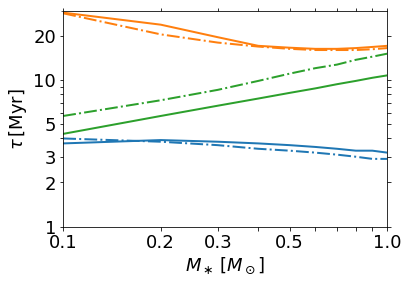

In [16]:
plt.cla()
#plt.rcParams["figure.figsize"] = (8, 6)
for i in range(3):
    j=i*2   #weakau　　0,2,4
    #plt.scatter(M, phystiming[j,:],color=colorlist[i],marker='x')
    plt.plot(M, phystiming[j,:],color=colorlist[i], linewidth = 2)#SigmaSL
for i in range(3):
    j=i*2+6   #weakau　　0,2,4
    #plt.scatter(M, phystiming[j,:],color=colorlist[i],marker='^')
    #plt.plot(M, phystiming[j,:],color=colorlist[i], linestyle = "dashed", linewidth = 1)#Sigma6um
for i in range(3):
    j=i*2+2   #weakau　　0,2,4
    #plt.scatter(M,timingT[1:,j], color=colorlist[i],marker='o')#q
    plt.plot(M,timingT[1:,j], color=colorlist[i], linestyle = "dashdot", linewidth = 2)#q
    
plt.xscale("log")
plt.yscale("log")
plt.xlabel(r'$M_\ast\,[M_\odot]$', fontsize=18)
plt.ylabel(r'$\tau\, \rm{[Myr]}$', fontsize=18)
#plt.grid(which='minor')
plt.ylim(1, 30)
plt.xlim(0.1, 1)
plt.tick_params(labelsize=18,left=True, right=True, bottom=True, top=True)
plt.xticks([0.1, 0.2, 0.3, 0.4, 0.5,0.6,0.7,0.8,0.9,1.0], [ "0.1", "0.2", "0.3", "", "0.5","", "", "", "", "1.0"])
plt.yticks([1, 2, 3, 4, 5,6,7,8,9,10,20], [ "1", "2", "3", "", "5","", "", "", "", "10", "20"])
plt.subplots_adjust(left=0.2, right=0.95, bottom=0.2, top=0.95)
plt.plot(0.00001,0.00001, color="k",label=r'$t=\tau_{\Sigma}$')
plt.plot(0.00001,0.00001, color="k",linestyle="dashdot",label=r'$t=\tau_{q}$')
plt.plot(0.00001,0.00001, color=colorlist[0],label="PEi")
plt.plot(0.00001,0.00001, color=colorlist[1],label="DWi")
plt.plot(0.00001,0.00001, color=colorlist[2],label="PEDWi")
#plt.legend(fontsize=12,loc='upper left',bbox_to_anchor=(0, 0.3), borderaxespad=0,frameon=False)
plt.savefig('timingweakall.jpg')

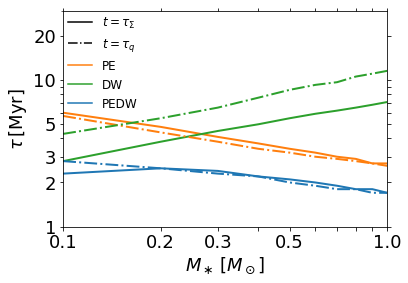

In [17]:
plt.cla()
#plt.rcParams["figure.figsize"] = (8, 6)

for i in range(3):
    j=i*2+1   #strongau　　0,2,4
    #plt.scatter(M, phystiming[j,:],color=colorlist[i],marker='x')
    plt.plot(M, phystiming[j,:],color=colorlist[i], linewidth = 2)#SigmaSL
for i in range(3):
    j=i*2+7   #strongau　　0,2,4
    #plt.scatter(M, phystiming[j,:],color=colorlist[i],marker='^')
    #plt.plot(M, phystiming[j,:],color=colorlist[i], linestyle = "dashed", linewidth = 1)#Sigma6um
for i in range(3):
    j=i*2+3   #weakau　　0,2,4
    #plt.scatter(M,timingT[1:,j], color=colorlist[i],marker='o')#q
    plt.plot(M,timingT[1:,j], color=colorlist[i], linestyle = "dashdot", linewidth = 2)#q
plt.xscale("log")
plt.yscale("log")
plt.xlabel(r'$M_\ast\,[M_\odot]$', fontsize=18)
plt.ylabel(r'$\tau\, \rm{[Myr]}$', fontsize=18)
#plt.grid(which='minor')
plt.ylim(1, 30)
#plt.subplots_adjust(left=0.2, right=0.95, bottom=0.2, top=0.95)
plt.xlim(0.1, 1)
plt.tick_params(labelsize=18,left=True, right=True, bottom=True, top=True)
plt.yticks([1, 2, 3, 4, 5,6,7,8,9,10,20], [ "1", "2", "3", "", "5","", "", "", "", "10", "20"])
plt.xticks([0.1, 0.2, 0.3, 0.4, 0.5,0.6,0.7,0.8,0.9,1.0], [ "0.1", "0.2", "0.3", "", "0.5","", "", "", "", "1.0"])
plt.subplots_adjust(left=0.2, right=0.95, bottom=0.2, top=0.95)
plt.plot(0.00001,0.00001, color="k",label=r'$t=\tau_{\Sigma}$')
plt.plot(0.00001,0.00001, color="k",linestyle="dashdot",label=r'$t=\tau_{q}$')
plt.plot(0.00001,0.00001, color=colorlist[0],label="PE")
plt.plot(0.00001,0.00001, color=colorlist[1],label="DW")
plt.plot(0.00001,0.00001, color=colorlist[2],label="PEDW")
plt.legend(fontsize=12,loc='upper left',bbox_to_anchor=(0, 1), borderaxespad=0,frameon=False)
plt.savefig('timingstrongall.jpg')

['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


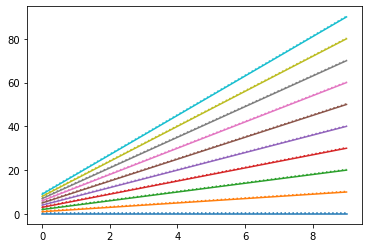

In [5]:
print(plt.rcParams['axes.prop_cycle'].by_key()['color'])
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
t = np.arange(10)
for i in range(10):
    line, = ax.plot(t,i*(t+1), linestyle = '-')
    ax.plot(t,i*(t+1)+.3,color = line.get_color(), linestyle = ':')
plt.show()

# [u'#1f77b4', u'#ff7f0e', u'#2ca02c', u'#d62728', u'#9467bd', u'#8c564b', u'#e377c2', u'#7f7f7f', u'#bcbd22', u'#17becf']

In [ ]:
phystiming=np.array([
 [ 29.,  24. , 19.7 ,17.2 ,16.7 ,16.4, 16.4, 16.6, 16.9 17.2],
 [ 6.  , 4.8 , 4.1 , 3.7 , 3.4 , 3.2,  3. ,  2.9,  2.7 , 2.7],
 [ 4.3 , 5.7 , 6.7 , 7.5 , 8.2 , 8.8 , 9.4 , 9.9, 10.4, 10.8],
 [ 2.8 , 3.8 , 4.5 , 5.  , 5.5 , 5.9 , 6.2 , 6.5,  6.8 , 7.1],
 [ 3.7 , 3.9 , 3.8 , 3.7 , 3.6 , 3.5 , 3.4,  3.3,  3.3,  3.2],
 [ 2.3 , 2.5 , 2.4 , 2.2 , 2.1,  2.  , 1.9,  1.8,  1.8,  1.7],#SigmaSL 01-10change
 [25.5, 19.9, 17.5, 16.2, 15.4 ,15.1 ,14.9, 14.8, 14.8 ,15. ],
 [ 5.4 , 4.2  ,3.6 , 3.3  ,3.1 , 2.9 , 2.8 , 2.7 , 2.6 , 2.5],
 [ 3.   ,3.9  ,4.7 , 5.2 , 5.7 , 6.1 , 6.4 , 6.8 , 7.1 , 7.4],
 [ 2.  , 2.7 , 3.3 , 3.7 , 4.  , 4.3 , 4.6 , 4.9,  5.1 , 5.3],
 [ 2.5 , 2.7 , 2.7 , 2.6 , 2.6 , 2.5 , 2.5 , 2.5,  2.4 , 2.4],
 [ 1.6 , 1.8 , 1.8 , 1.7 , 1.7 , 1.6 , 1.6 , 1.5,  1.5 , 1.5]#Sigma6um
                ]) #SL #6um

 [ 29.  24.  19.7 17.2 16.7 16.4 16.4 16.6 16.9 17.2]
 [ 6.   4.8  4.1  3.7  3.4  3.2  3.   2.9  2.7  2.7]
 [ 4.3  5.7  6.7  7.5  8.2  8.8  9.4  9.9 10.4 10.8]
 [ 2.8  3.8  4.5  5.   5.5  5.9  6.2  6.5  6.8  7.1]
 [ 3.7  3.9  3.8  3.7  3.6  3.5  3.4  3.3  3.3  3.2]
 [ 2.3  2.5  2.4  2.2  2.1  2.   1.9  1.8  1.8  1.7]

               [29,24,19.8,17.3,15.9,15.5,15.5,15.3,15.3,15.3],
               [5.5,4.8,4.1,3.7,3.4,3.2,3.0,2.9,2.8,2.7],
               [4.7,5.7,6.6,7.5,8.2,8.8,9.5,10,10.4,10.7],
               [3.1,3.8,4.5,5,5.5,5.8,6.2,6.5,6.8,7.1],
               [3.7,3.9,3.8,3.7,3.7,3.6,3.5,3.4,3.3,3.2],
               [2.3,2.4,2.3,2.2,2.1,2,1.9,1.8,1.8,1.7],